**Arboles de Decisión**

# JUAN SIMON SUAREZ ALVARADO #

In [1]:
#importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [2]:
#cargamos el dataset y mostramos las 5 primeras filas 
data = pd.read_csv("calidadvino.csv") 
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.shape

(1599, 12)

In [4]:
#identificamos algunas medidas de tendencia central
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

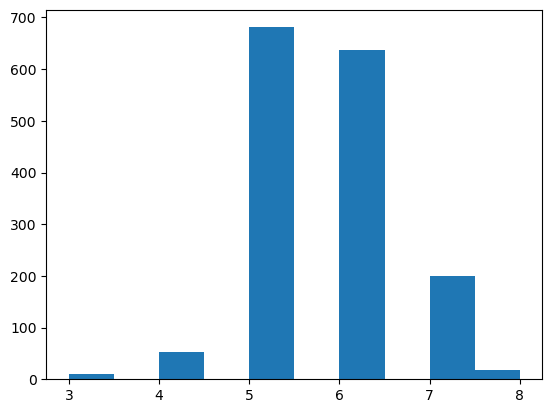

In [5]:
# a través de un histograma podemos ver la cantidad de vinos que hay de cada calidad 
plt.hist(data.quality)

**En este histograma se puede ver que la mayor cantidad de vinos estan en las calidades 5 y 6**

In [6]:
#identificamos valores nulos 
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**Se evidencia que el dataset no contiene valores nulos**

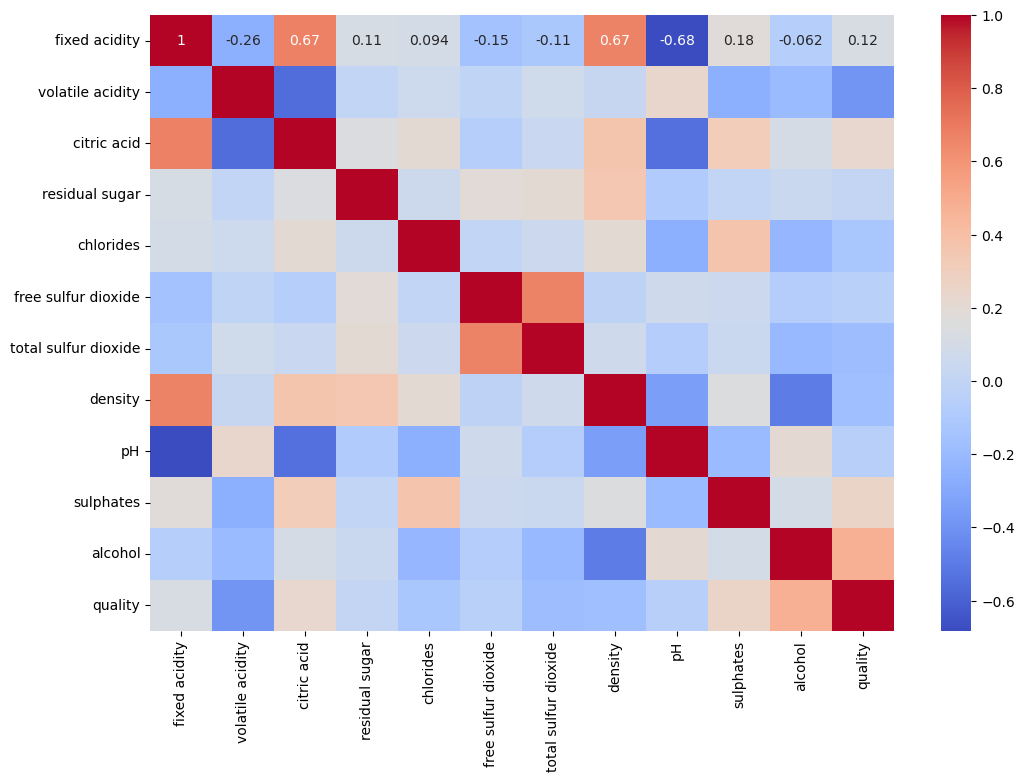

In [7]:
# Correalción entre las variables 
#Un valor cercano a 1 indica una correlación positiva fuerte (las variables aumentan juntas).
#Un valor cercano a -1 indica una correlación negativa fuerte (una variable aumenta mientras la otra disminuye).
#Un valor cercano a 0 indica una correlación débil o ninguna correlación.
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


1. **La calidad tiene una correlación negativa moderada con la acidez volátil y una correlación positiva moderada con el contenido de alcohol.**
2. **La acidez fija y la volátil tienen una correlación positiva bastante fuerte entre sí.**
3. **El dióxido de azufre y los sulfatos muestran una correlación negativa moderada con la calidad.**
4. **El pH tiene una correlación positiva moderada con la calidad y negativa con la acidez fija y volátil.**

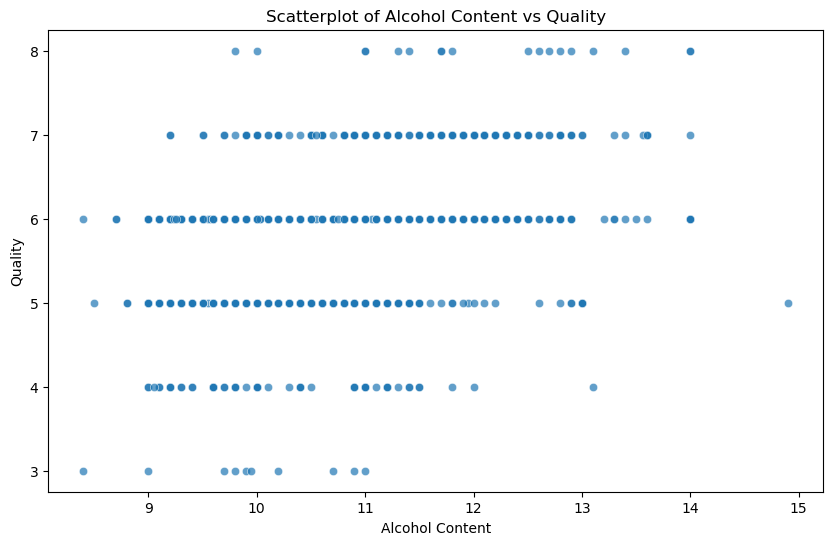

In [8]:
# Scatterplot entre 'alcohol' y 'quality'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='alcohol', y='quality', data=data, alpha=0.7)
plt.title('Scatterplot of Alcohol Content vs Quality')
plt.xlabel('Alcohol Content')
plt.ylabel('Quality')
plt.show()


**si bien no hay una correlación lineal clara, el gráfico de dispersión sugiere que un contenido de alcohol moderado (alrededor del 11-14%) puede estar asociado con puntajes de calidad más altos, mientras que niveles de alcohol muy bajos o muy altos tienden a corresponder con calificaciones de calidad más bajas para este conjunto de datos en particular.**

In [9]:
corr = data.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


**A partir de las correlaciones mostradas en esta matriz, seleccionaremos aquellas que presentan una correlación mas alta con la variable objetivo, con el fin de obtener un modelo mas exacto y más interpretable. Eliminar características que tienen una baja correlación con la variable objetivo puede ayudar a reducir el ruido y la complejidad del modelo.**

In [10]:
# Definir las listas de columnas predictoras y variable objetivo
predictors_col = ["volatile acidity", "citric acid", "sulphates" ,"alcohol"]
target_col = ["quality"]

In [11]:
predictors = data[predictors_col]
target = data[target_col] 

In [12]:
predictors

,volatile acidity,citric acid,sulphates,alcohol
0,0.700,0.00,0.56,9.4
1,0.880,0.00,0.68,9.8
2,0.760,0.04,0.65,9.8
3,0.280,0.56,0.58,9.8
4,0.700,0.00,0.56,9.4
...,...,...,...,...
1594,0.600,0.08,0.58,10.5
1595,0.550,0.10,0.76,11.2
1596,0.510,0.13,0.75,11.0
1597,0.645,0.12,0.71,10.2


In [13]:
target

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


**Se definen listas para seleccionar características y la variable objetivo del dataset de vinos. Luego, crea dos nuevos conjuntos de datos: predictors con características y target con calidad del vino que es la variable objetivo.**

In [14]:
# Matriz de correlación de solo las variables predictoras.
corr = predictors.corr()
corr

,volatile acidity,citric acid,sulphates,alcohol
volatile acidity,1.000000,-0.552496,-0.260987,-0.202288
citric acid,-0.552496,1.000000,0.312770,0.109903
sulphates,-0.260987,0.312770,1.000000,0.093595
alcohol,-0.202288,0.109903,0.093595,1.000000


# Dividir el dataset en Train y Test para evaluar correctamente el modelo #

In [15]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.15, random_state=13)

In [16]:
tree = DecisionTreeClassifier()

# Entrenar el modelo configurando los diferentes hiperparámetros #

In [17]:
arbol = tree.fit(X_train, y_train)

[Text(0.46351466941378283, 0.9807692307692307, 'x[3] <= 10.525\ngini = 0.644\nsamples = 1359\nvalue = [9, 46, 572, 546, 173, 13]'),
 Text(0.18727042623806683, 0.9423076923076923, 'x[2] <= 0.535\ngini = 0.545\nsamples = 826\nvalue = [6, 30, 481, 278, 31, 0]'),
 Text(0.032210247613365155, 0.9038461538461539, 'x[0] <= 0.335\ngini = 0.372\nsamples = 193\nvalue = [2, 14, 150, 26, 1, 0]'),
 Text(0.00954653937947494, 0.8653846153846154, 'x[1] <= 0.375\ngini = 0.562\nsamples = 11\nvalue = [0, 1, 4, 6, 0, 0]'),
 Text(0.00477326968973747, 0.8269230769230769, 'x[3] <= 9.4\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2, 0, 0, 0]'),
 Text(0.002386634844868735, 0.7884615384615384, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0, 0, 0]'),
 Text(0.007159904534606206, 0.7884615384615384, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2, 0, 0, 0]'),
 Text(0.014319809069212411, 0.8269230769230769, 'x[3] <= 9.75\ngini = 0.375\nsamples = 8\nvalue = [0, 0, 2, 6, 0, 0]'),
 Text(0.011933174224343675, 0.7884615384615384

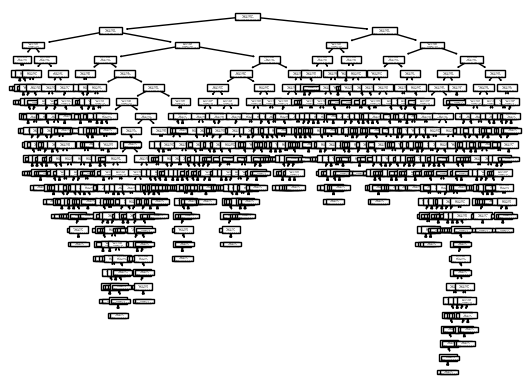

In [18]:
plot_tree(arbol)

In [19]:
predicciones = arbol.predict(X_test)

In [20]:
predicciones

array([6, 5, 5, 5, 6, 5, 6, 7, 5, 6, 5, 6, 5, 6, 7, 6, 6, 5, 5, 7, 5, 5,
       6, 5, 5, 5, 5, 5, 5, 5, 7, 6, 5, 6, 5, 6, 5, 5, 6, 6, 5, 6, 6, 6,
       5, 6, 6, 7, 6, 6, 5, 5, 6, 5, 7, 5, 5, 7, 5, 5, 5, 5, 5, 7, 7, 7,
       6, 5, 5, 5, 6, 5, 7, 6, 5, 4, 5, 5, 5, 5, 6, 6, 6, 5, 6, 6, 6, 6,
       7, 6, 5, 6, 7, 7, 6, 6, 5, 5, 6, 5, 5, 7, 6, 5, 7, 6, 5, 6, 5, 6,
       5, 6, 5, 7, 5, 6, 6, 7, 5, 6, 5, 4, 5, 6, 5, 6, 5, 5, 6, 7, 6, 5,
       5, 7, 6, 6, 7, 5, 6, 7, 6, 5, 4, 6, 6, 5, 5, 5, 5, 4, 5, 8, 5, 5,
       5, 5, 6, 4, 6, 5, 6, 6, 6, 4, 6, 7, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6,
       5, 6, 6, 5, 5, 6, 6, 8, 5, 5, 6, 6, 5, 5, 5, 6, 5, 5, 7, 5, 7, 6,
       5, 6, 6, 6, 6, 6, 6, 7, 6, 7, 7, 6, 6, 5, 5, 6, 7, 5, 5, 8, 5, 7,
       5, 5, 5, 6, 5, 6, 5, 5, 5, 6, 6, 5, 6, 5, 5, 6, 6, 5, 6, 5],
      dtype=int64)

In [21]:
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames =['Actual'], colnames=['predicciones'])

predicciones,4,5,6,7,8
Actual,,,,,
3,0,1,0,0,0
4,2,4,1,0,0
5,1,83,19,6,0
6,2,21,55,11,3
7,1,3,9,13,0
8,0,0,5,0,0


In [22]:
accuracy = accuracy_score(y_test,predicciones)
accuracy

0.6375

# Evaluar el desmpeño del modelo en el conjunto de Test con métricas como precisión, recall, F1- score, etc. #

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split


# Realizar predicciones en el conjunto de prueba
y_pred = arbol.predict(X_test)

# Imprimir el classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.33      0.29      0.31         7
           5       0.74      0.76      0.75       109
           6       0.62      0.60      0.61        92
           7       0.43      0.50      0.46        26
           8       0.00      0.00      0.00         5

    accuracy                           0.64       240
   macro avg       0.35      0.36      0.36       240
weighted avg       0.63      0.64      0.63       240



C:\Users\jasim\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jasim\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jasim\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Interpretación del Classification Report

El modelo tiene un **accuracy** del 64%, lo que significa que el 64% de las predicciones realizadas son correctas. Es una métrica general que muestra el rendimiento del modelo en el conjunto de datos de prueba.

#### Clase 5
Destaca con un **precision** del 74% y un **recall** del 76%, lo que indica que el modelo es bastante bueno identificando y clasificando esta clase. El **F1-score** de 0.75 también es bastante equilibrado, reflejando un buen rendimiento.

#### Clase 6
Presenta un **precision** del 62% y un **recall** del 60%, lo que sugiere que el modelo es consistente en identificar esta clase. El **F1-score** de 0.61 es una medida armonizada que también refleja un rendimiento equilibrado.

Para las demás clases, aunque las métricas pueden parecer más bajas, el modelo aún logra identificar ciertos patrones con precisiones y recalls en rangos aceptables. 

#### Métricas generales

- **Macro avg**: Aunque las métricas promedio para todas las clases están en el rango de 0.35-0.36, es importante recordar que estas métricas pueden verse afectadas por las clases más pequeñas. 

- **Weighted avg**: Las métricas ponderadas por el número de muestras para cada clase están en el rango del 63-64%, lo que muestra un rendimiento equilibrado considerando todas las clases.

### Conclusión

El modelo muestra un rendimiento sólido con un **accuracy** del 64%. Aunque hay áreas de mejora, especialmente en la identificación de clases menos representadas, el modelo es capaz de realizar predicciones precisas en las clases más grandes y comunes. Con ajustes adicionales y considerando técnicas para abordar el desequilibrio de clases, podríamos mejorar aún más el rendimiento en las clases menos representadas.
